In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("sales_data_sample.csv",encoding='ISO-8859-1')

X = df[['QUANTITYORDERED','PRICEEACH','ORDERLINENUMBER']]
y = df['SALES']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=X.columns)
X

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER
0,-0.522891,0.596978,-1.057059
1,-0.112201,-0.114450,-0.347015
2,0.606505,0.549384,-1.057059
3,1.017195,-0.019759,-0.110334
4,1.427884,0.810158,1.783116
...,...,...,...
2818,-1.549615,0.810158,2.019797
2819,-0.625563,0.810158,-1.293740
2820,0.811850,0.810158,-0.583696
2821,-0.112201,-1.061864,-1.293740


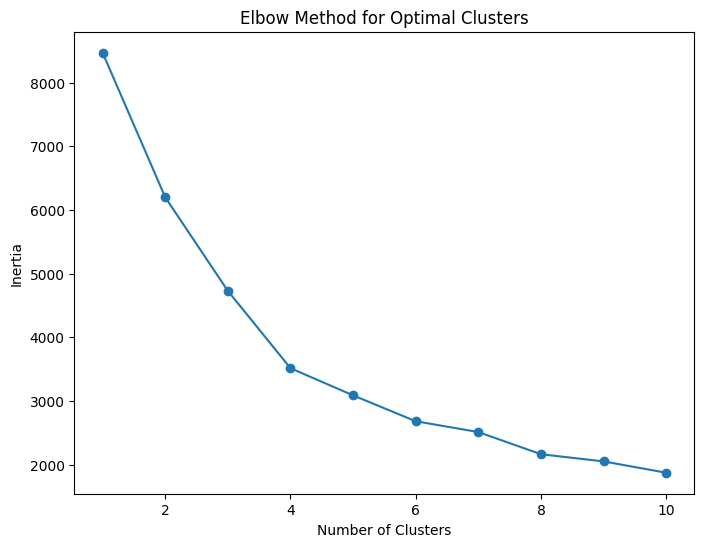

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate inertia for a range of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


In [26]:

optimal_k = 6


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)



X[['SALES','Cluster']]


KeyError: "['SALES'] not in index"

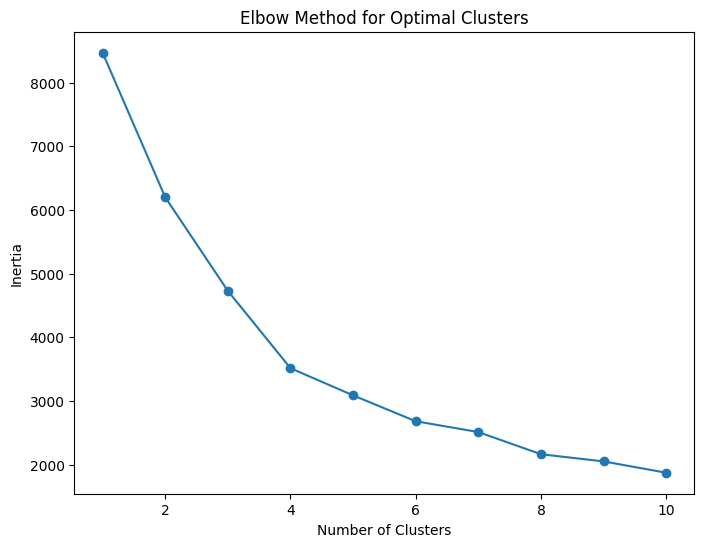

         QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER        SALES
Cluster                                                          
0              -0.377698  -1.431013         0.990991  1712.185455
1               0.899591   0.587499        -0.705517  5382.413317
2               0.919748   0.410242         1.074879  4903.875573
3              -0.851351   0.505151        -0.647702  3145.803403
4               0.192497  -1.428260        -0.620933  2029.225776
5              -0.823421   0.591101         1.143337  3240.008516


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv("sales_data_sample.csv", encoding='ISO-8859-1')

# Select features and target
X = df[['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER']]
y = df['SALES']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER'])

# Determine optimal number of clusters using elbow method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Apply KMeans with optimal number of clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Merge 'SALES' data to X for further analysis if needed
X['SALES'] = y.reset_index(drop=True)

# Calculate the mean of each feature within each cluster
cluster_means = X.groupby('Cluster').mean()
print(cluster_means)
